In [30]:
import os
import glob
import re
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
locales = ['af-ZA', 'da-DK', 'de-DE', 'en-US', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 
           'it-IT', 'jv-ID', 'lv-LV', 'ms-MY', 'nb-NO', 'nl-NL', 'pl-PL', 'pt-PT', 'ro-RO', 
           'ru-RU', 'sl-SL', 'sv-SE', 'sq-AL', 'sw-KE', 'tl-PH', 'tr-TR', 'vi-VN', 'cy-GB']

In [4]:
Asia = ['ru-RU', 'jv-ID', 'ms-MY', 'tl-PH', 'tr-TR', 'vi-VN']
Africa = ['af-ZA', 'sw-KE']
Europe = ['da-DK', 'de-DE', 'es-ES', 'fr-FR', 'fi-FI', 'hu-HU', 'is-IS', 'it-IT', 'lv-LV', 'nb-NO', 'nl-NL',
          'pl-PL', 'pt-PT', 'ro-RO', 'sl-SL', 'sv-SE', 'cy-GB', 'sq-AL']
North_America = ['en-US']

In [ ]:
os.mkdir("Dataset - Task3")

In [40]:
for locale in Africa:
    with open(f"Dataset/{locale}.txt", 'r') as first, open(f"Dataset - Task3/Africa.txt", 'a') as second:
        for i in first:
            second.write(i)

In [41]:
for locale in Asia:
    with open(f"Dataset/{locale}.txt", 'r', encoding='utf-8') as first, open(f"Dataset - Task3/Asia.txt", 'a', encoding='utf-8') as second:
        for i in first:
            second.write(i)

In [42]:
for locale in Europe:
    with open(f"Dataset/{locale}.txt", 'r', encoding='utf-8') as first, open(f"Dataset - Task3/Europe.txt", 'a', encoding='utf-8') as second:
        for i in first:
            second.write(i)

In [43]:
for locale in North_America:
    with open(f"Dataset/{locale}.txt", 'r', encoding='utf-8') as first, open(f"Dataset - Task3/North_America.txt", 'a', encoding='utf-8') as second:
        for i in first:
            second.write(i)

In [5]:
data = []
label = []

In [6]:
for file in glob.glob(os.path.join("Dataset - Task3","*.txt")): # Recursively look for all files in the directory
    labels = os.path.basename(file.split('.')[0])
    with open(file, 'r', encoding='utf-8') as f:
        s = f.readlines()
        data.extend(s)
        label.extend([labels] * len(s))
    

In [7]:
data[:5]

['maak my wakker nege-uur v. m. op vrydag\n',
 "stel 'n alarm vir twee ure van nou af\n",
 'janneman stilte\n',
 'stop\n',
 'janneman onderbreek dit vir tien sekondes\n']

In [8]:
data = [sentence[:-1] for sentence in data] # to remove the \n characters

In [9]:
data[:5]

['maak my wakker nege-uur v. m. op vrydag',
 "stel 'n alarm vir twee ure van nou af",
 'janneman stilte',
 'stop',
 'janneman onderbreek dit vir tien sekondes']

In [10]:
len(data), len(label)

(446067, 446067)

In [11]:
set(label)

{'Africa', 'Asia', 'Europe', 'North_America'}

In [12]:
# Converting the labels to numeric type
label_mapping = {   
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North_America': 3
}

In [13]:
label_mapped = [label_mapping[i] for i in label]
set(label_mapped), len(label_mapped)

({0, 1, 2, 3}, 446067)

In [14]:
Data = pd.DataFrame(data, columns=['Sentences'])
Data.head()

,Sentences
0,maak my wakker nege-uur v. m. op vrydag
1,stel 'n alarm vir twee ure van nou af
2,janneman stilte
3,stop
4,janneman onderbreek dit vir tien sekondes


In [15]:
# Case Normalization : In order to reduce all the elements to lower case
Data['Sentences'] = Data['Sentences'].str.lower()

In [16]:
# To remove puntuations
Data["Sentences"] = Data["Sentences"].apply(lambda x: re.sub(r"[^\w\s]", "", x))
# To remove special characters
Data["Sentences"] = Data["Sentences"].apply(lambda x: re.sub(r"[@#\$%^&*\(\)\\/\+-_=\[\]\{\}<>]", "", x))

# To remove Number
Data["Sentences"] = Data["Sentences"].apply(lambda x: re.sub(r'\d+', '', x))

In [17]:
Data.head()

,Sentences
0,maak my wakker negeuur v m op vrydag
1,stel n alarm vir twee ure van nou af
2,janneman stilte
3,stop
4,janneman onderbreek dit vir tien sekondes


In [18]:
# Applying Lemmatization
l = WordNetLemmatizer()
Data["Sentences"] = Data["Sentences"].apply(lambda x: " ".join(l.lemmatize(word, "v") for word in x.split()))

In [19]:
Data.head()

,Sentences
0,maak my wakker negeuur v m op vrydag
1,stel n alarm vir twee ure van nou af
2,janneman stilte
3,stop
4,janneman onderbreek dit vir tien sekondes


The Data is Preprocessed to remove puntuations, special characters, numbers which does not occupy a significant portion of the corpus. The data undergoes lemmatization with respect to verbs. Data is case normalized to reduce any ambiguity between same words in different cases. This preprocessed data is fed into the model. 

In [20]:
data = list(Data['Sentences'])
data[:5]

['maak my wakker negeuur v m op vrydag',
 'stel n alarm vir twee ure van nou af',
 'janneman stilte',
 'stop',
 'janneman onderbreek dit vir tien sekondes']

In [21]:
text2vec = TfidfVectorizer(min_df=0.001)

1. TfidfVectorizer is also a pre-processing technique used to convert text data into numerical form. 
2. TfidfVectorizer not only counts the frequency of each word but also assigns a weight to each word based on its frequency in the document and its frequency in the entire corpus. 
3. The tokens appearing in a minimum of 446 documents is only considered for computation feasibility.

This means that it gives higher weights to words that are important or informative in the document and lower weights to common words that are not. This is achieved through a term frequency-inverse document frequency (TF-IDF) formula that balances the frequency of a word in a document with its frequency in the entire corpus.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data, label_mapped, test_size=0.2, random_state=42, stratify=label_mapped)
# Results in 80% training data, 20% test data

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.125, random_state=42, stratify=Y_train) 
# Results in 70% training data, 10% Validation data

In [24]:
x_train = text2vec.fit_transform(X_train)
x_test = text2vec.transform(X_test)
x_val = text2vec.transform(X_val)

### Approximating Regularized Discriminant Analysis by using Linear Discriminant Analysis and Quadratic Discriminant Analysis.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [26]:
lda = LDA()
qda = QDA()

In [27]:
lda.fit(x_train.toarray(), Y_train) # Fitting the LDA model

LinearDiscriminantAnalysis()

In [28]:
qda.fit(x_train.toarray(), Y_train)

C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [31]:
def combine_pred(lda_pred_proba, qda_pred_proba, alpha):
    return  alpha* lda_pred_proba + (1 - alpha) * qda_pred_proba

# Step 3: Evaluate accuracy for different alpha values
alphas = np.linspace(0, 1, 20)  # Values of alpha between 0 and 1

best_alpha = 0
best_accuracy = 0


In [33]:
for alpha in alphas:
    lda_pred = lda.predict_proba(x_val.toarray())
    qda_pred = qda.predict_proba(x_val.toarray())
    s
    # Combine the predicted probabilities
    combinedPredictions = combine_pred(lda_pred, qda_pred, alpha)
    
    combinedPredictions = np.argmax(combinedPredictions, axis=1)
    
    accuracy = metrics.accuracy_score(np.array(Y_val), np.array(combinedPredictions))
    print(f"Alpha = {alpha:.4f}, Validation Accuracy = {accuracy:.4f}")
    
    # Best alpha and corresponding accuracy
    if accuracy > best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy


Alpha = 0.0000, Validation Accuracy = 0.7593
Alpha = 0.0526, Validation Accuracy = 0.7593
Alpha = 0.1053, Validation Accuracy = 0.7593
Alpha = 0.1579, Validation Accuracy = 0.7593
Alpha = 0.2105, Validation Accuracy = 0.7593
Alpha = 0.2632, Validation Accuracy = 0.7593
Alpha = 0.3158, Validation Accuracy = 0.7593
Alpha = 0.3684, Validation Accuracy = 0.7593
Alpha = 0.4211, Validation Accuracy = 0.7594
Alpha = 0.4737, Validation Accuracy = 0.7594
Alpha = 0.5263, Validation Accuracy = 0.9339
Alpha = 0.5789, Validation Accuracy = 0.9336
Alpha = 0.6316, Validation Accuracy = 0.9330
Alpha = 0.6842, Validation Accuracy = 0.9330
Alpha = 0.7368, Validation Accuracy = 0.9325
Alpha = 0.7895, Validation Accuracy = 0.9321
Alpha = 0.8421, Validation Accuracy = 0.9318
Alpha = 0.8947, Validation Accuracy = 0.9318
Alpha = 0.9474, Validation Accuracy = 0.9317
Alpha = 1.0000, Validation Accuracy = 0.9316


1. RDA limits the separate covariance of QDA towards the common covariance of LDA. 
2. LDA considers that all classes have the same covariance and equal mean.
3. QDA does not assume that all classes have equal mean and covariance.

Bothe LDA and QDA is a limiting case of RDA.
Therefore we are considering the predictions of both discriminant analysis model which is weighted by a hyper parameter alpha. This is equivalent to combining the covariance matrix of both models by assigning weight, computing the log likehood and predicting the final outputs. This approach is less mathematically intensive and captures the same sense of RDA.

The best alpha turns out to be close to 0.5 which considers properties of LDA & QDA to make the final prediction.

In [34]:
# for Train set
lda_pred_train = lda.predict_proba(x_train.toarray())
qda_pred_train = qda.predict_proba(x_train.toarray())

combined_train_pred = np.argmax(combine_pred(lda_pred_train, qda_pred_train, best_alpha), axis=1)
accuracy = metrics.accuracy_score(np.array(Y_train), np.array(combined_train_pred))
print(f"Training Accuracy = {accuracy:.4f}")

Training Accuracy = 0.9343


In [35]:
print("Train Data Performace Metrics:")
print(metrics.classification_report(np.array(Y_train), np.array(combined_train_pred)))

Train Data Performace Metrics:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     23129
           1       0.99      0.81      0.89     69388
           2       0.92      0.99      0.95    208164
           3       0.92      0.86      0.89     11565

    accuracy                           0.93    312246
   macro avg       0.94      0.88      0.91    312246
weighted avg       0.94      0.93      0.93    312246



Text(45.722222222222214, 0.5, 'Predicted label')

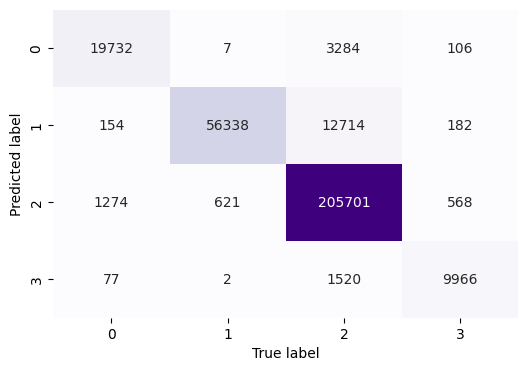

In [36]:
confusion_matrix = metrics.confusion_matrix(np.array(Y_train), np.array(combined_train_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

The Model achieves a respectable 93.4% training accuracy. The confusion matrix depicts that the model learns the features of classes 0, 2 and 3 achieving good classification on these classes. The Model's learning with respect to class 1 is a little amiguious as it misclassifies a significant portion of tokens belonging to class Asia to class Europe. Though the languages of these regions might stay approximately similar creating ambiguity for the model to learn clear features to distinguish. 

In [37]:
# for Validation set
lda_pred_val = lda.predict_proba(x_val.toarray())
qda_pred_val = qda.predict_proba(x_val.toarray())

combined_val_pred = np.argmax(combine_pred(lda_pred_val, qda_pred_val, best_alpha), axis=1)
accuracy = metrics.accuracy_score(np.array(Y_val), np.array(combined_val_pred))
print(f"Validation Accuracy = {accuracy:.4f}")

Validation Accuracy = 0.9339


In [38]:
print("Validation Data Performace Metrics:")
print(metrics.classification_report(np.array(Y_val), np.array(combined_val_pred)))

Validation Data Performace Metrics:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3304
           1       0.99      0.81      0.89      9913
           2       0.92      0.99      0.95     29738
           3       0.93      0.86      0.89      1652

    accuracy                           0.93     44607
   macro avg       0.94      0.88      0.91     44607
weighted avg       0.94      0.93      0.93     44607



Text(45.722222222222214, 0.5, 'Predicted label')

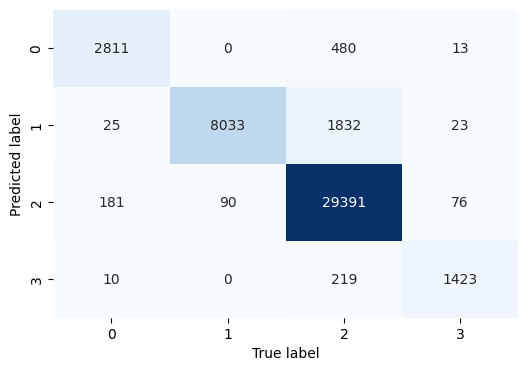

In [39]:
confusion_matrix = metrics.confusion_matrix(np.array(Y_val), np.array(combined_val_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

The model achieves a 93% validation accuracy, the model's prediction is fine tuned using different values of alpha to tradeoff between LDA and QDA's predictions. The alpha is approx 0.53 for which the model's predictions are considered. The confusion matrix depicts the model's performance over all the 4 classes.

In [40]:
# for Test set
lda_pred_test = lda.predict_proba(x_test.toarray())
qda_pred_test = qda.predict_proba(x_test.toarray())

combined_test_pred = np.argmax(combine_pred(lda_pred_test, qda_pred_test, best_alpha), axis=1)
accuracy = metrics.accuracy_score(np.array(Y_test), np.array(combined_test_pred))
print(f"Testing Accuracy = {accuracy:.4f}")

Testing Accuracy = 0.9337


In [41]:
print("Test Data Performace Metrics:")
print(metrics.classification_report(np.array(Y_test), np.array(combined_test_pred)))

Test Data Performace Metrics:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      6609
           1       0.99      0.81      0.89     19825
           2       0.92      0.99      0.95     59476
           3       0.92      0.86      0.89      3304

    accuracy                           0.93     89214
   macro avg       0.94      0.88      0.91     89214
weighted avg       0.94      0.93      0.93     89214



Text(45.722222222222214, 0.5, 'Predicted label')

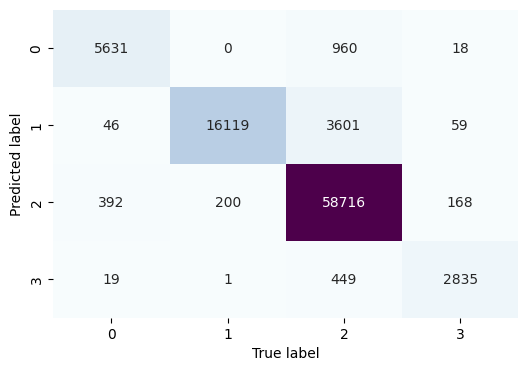

In [42]:
confusion_matrix = metrics.confusion_matrix(np.array(Y_test), np.array(combined_test_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

The model achieves a 93% test accuracy indicating the model's generalization ability. The confusion matrix depicts that the number of missclassifications is more for class 1 compared to all the other classes due the similarity of languages in the continents Asia and Europe.